In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/after_up_BCH1.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,BCH,up,2018-02-08 19:00:00,CryptoGulp,0,0,NaN,"Top 5 Cryptocurrencies Prices $BTC: $8,193.55 ..."
1,BCH,up,2018-02-08 19:00:01,BchPulse,0,0,#BCHUSD #BitcoinCash,BCH / USD $1270.24 | +0.0507% #BCHUSD #Bitcoin...
2,BCH,up,2018-02-08 19:00:02,ScrapeINT,0,0,NaN,Bitcoin:$8193.55 Ethereum:$802.019 Bitcoin Cas...
3,BCH,up,2018-02-08 19:00:02,mister_zk0,0,0,#OpenBazaarBCH,"Hey @OpenBazaar, I want my $BCH! My Peer ID is..."
4,BCH,up,2018-02-08 19:00:02,cryptcoin_trade,0,0,#BCC #bitcoincash,"Bitcoin Cash: $1,289.60 +27.81% (+$280.60) Hig..."
...,...,...,...,...,...,...,...,...
862,BCH,up,2018-02-08 23:56:16,cryptow1re,0,0,NaN,@reddit : Crypto Watch: Bitcoin Cash (BCH) Pri...
863,BCH,up,2018-02-08 23:56:44,ToboRaki,0,0,NaN,Bitcoin Cash $BCH price: $1280.42 HURRY! Binan...
864,BCH,up,2018-02-08 23:57:42,YoursOrg,2,7,NaN,Campus Creations - Barpay To Accept Bitcoin Ca...
865,BCH,up,2018-02-08 23:58:23,CryptoCody7,1,2,#Bitcoin #Bitcoin #BitcoinCash #Ethereum,Current #Bitcoin #BitcoinCash &amp; #Ethereum....


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=x ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0      [top, 5, cryptocurrencies, prices, $, btc, :, ...
1      [bch, usd, $, 1270.24, |, +0.0507, %, bchusd, ...
2      [bitcoin, :, $, 8193.55, ethereum, :, $, 802.0...
3      [hey, @, openbazaar, ,, i, want, my, $, bch, !...
4      [bitcoin, cash, :, $, 1,289.60, +27.81, %, (, ...
                             ...                        
862    [@, reddit, :, crypto, watch, :, bitcoin, cash...
863    [bitcoin, cash, $, bch, price, :, $, 1280.42, ...
864    [campus, creations, barpay, to, accept, bitcoi...
865    [current, bitcoin, bitcoincash, &, amp, ;, eth...
866    [biggest, losers, (, 1, hr, ), bitcoin, cash, ...
Name: text, Length: 867, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0      [top, cryptocurrencies, prices, $, btc, :, $, ...
1               [bch, usd, $, |, %, bchusd, bitcoincash]
2      [bitcoin, :, $, ethereum, :, $, bitcoin, cash,...
3      [hey, @, openbazaar, ,, want, $, bch, !, peer,...
4      [bitcoin, cash, :, $, +27.81, %, (, +, $, ), h...
                             ...                        
862    [@, reddit, :, crypto, watch, :, bitcoin, cash...
863    [bitcoin, cash, $, bch, price, :, $, hurry, !,...
864    [campus, creations, barpay, accept, bitcoin, c...
865    [current, bitcoin, bitcoincash, amp, ;, ethere...
866    [biggest, losers, (, hr, ), bitcoin, cash, $, ...
Name: text, Length: 867, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [19]:
article_contents = tokenized_doc.values.tolist()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [21]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [22]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [23]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [24]:
word2id = defaultdict(lambda: 0)

In [25]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [26]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [27]:
len(tf_idf_result)

2143

In [28]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

2143


In [29]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [30]:
sentences = article_contents

In [31]:
from gensim.models import Word2Vec

In [32]:
model = Word2Vec(sentences, min_count=1)

In [33]:
len(model.wv.vocab)

2143

In [34]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [36]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [37]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [38]:
temp_cluster_result['cluster'] = assigned_clusters

In [39]:
temp_cluster_result['raw_data'] = X.tolist()

In [40]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [43]:
len(cosine_centroid_list)

2143

In [44]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [45]:
sum(temp_distance[3])

19.224472692272315

In [46]:
import scipy.spatial.distance as dist

In [47]:
dist.cosine(X[0],cosine_centroid_list[0])

0.0009278936147725236

In [48]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.6080154357907795

In [49]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [50]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [51]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1902,"[0.00804714486002922, -0.0002975604438688606, ...",bitcointrading,0,"[0.004235634, -0.0012230098, -0.0049689724, -0...",0.072981,0.000662,1.072319,NaN
22,"[0.013174261897802353, -0.0035649973433464766,...",cotización,0,"[0.004235634, -0.0012230098, -0.0049689724, -0...",0.077431,0.003310,1.074121,NaN
269,"[0.005686447490006685, -0.0009314538910984993,...",tradebitcoin,0,"[0.004235634, -0.0012230098, -0.0049689724, -0...",0.075746,0.001324,1.074422,NaN
1616,"[0.004892047494649887, -0.004240531474351883, ...",thrive,0,"[0.004235634, -0.0012230098, -0.0049689724, -0...",0.077765,0.000662,1.077103,NaN
1762,"[0.013516459614038467, -0.0028846024069935083,...",мяли,0,"[0.004235634, -0.0012230098, -0.0049689724, -0...",0.091437,0.000662,1.090775,NaN
1450,"[0.0033891797065734863, -0.00414400827139616, ...",broke,0,"[0.004235634, -0.0012230098, -0.0049689724, -0...",0.092770,0.000662,1.092109,NaN
803,"[0.010857890360057354, -0.0009687179699540138,...",employment,0,"[0.004235634, -0.0012230098, -0.0049689724, -0...",0.093821,0.001324,1.092497,NaN
1410,"[0.004646498244255781, -0.0017667654901742935,...",cnbc,0,"[0.004235634, -0.0012230098, -0.0049689724, -0...",0.094892,0.001986,1.092906,NaN
609,"[0.003801977261900902, -0.0015279788058251143,...",amaze,0,"[0.004235634, -0.0012230098, -0.0049689724, -0...",0.101501,0.001324,1.100177,NaN
1132,"[0.010974512435495853, -0.0022981881629675627,...",bakarım,0,"[0.004235634, -0.0012230098, -0.0049689724, -0...",0.101954,0.000662,1.101292,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1740,"[0.00784046109765768, 0.001860066782683134, -0...",image,1,"[0.0033417507, -0.00045824255, -0.00329339, -0...",0.113469,0.000662,1.112807,NaN
1508,"[0.008117005228996277, 0.0031284955330193043, ...",comply,1,"[0.0033417507, -0.00045824255, -0.00329339, -0...",0.118355,0.000662,1.117693,NaN
1534,"[0.005408739671111107, -0.002650077221915126, ...",asics,1,"[0.0033417507, -0.00045824255, -0.00329339, -0...",0.128226,0.000662,1.127564,NaN
1449,"[0.008500514551997185, 0.002467781538143754, -...",insolvent,1,"[0.0033417507, -0.00045824255, -0.00329339, -0...",0.137683,0.000662,1.137021,NaN
2061,"[0.008963366039097309, -0.004421446938067675, ...",relevant,1,"[0.0033417507, -0.00045824255, -0.00329339, -0...",0.144710,0.000662,1.144048,NaN
873,"[0.008725115098059177, 0.0016394370468333364, ...",word,1,"[0.0033417507, -0.00045824255, -0.00329339, -0...",0.146181,0.001324,1.144857,NaN
1627,"[0.007040628232061863, 0.002456239890307188, -...",siehe,1,"[0.0033417507, -0.00045824255, -0.00329339, -0...",0.149888,0.000662,1.149226,NaN
1984,"[0.0066542550921440125, -0.0031730863265693188...",deepsend,1,"[0.0033417507, -0.00045824255, -0.00329339, -0...",0.159471,0.000662,1.158809,NaN
1924,"[0.010097093880176544, 0.0032159416005015373, ...",работата,1,"[0.0033417507, -0.00045824255, -0.00329339, -0...",0.163010,0.000662,1.162348,NaN
2043,"[0.007023090962320566, -0.004986479412764311, ...",mainstream,1,"[0.0033417507, -0.00045824255, -0.00329339, -0...",0.164238,0.000662,1.163576,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2,"[0.3277187943458557, -0.10027248412370682, -0....",bitcoin,2,"[0.015418747, -0.0046798997, -0.017630963, -0....",0.000151,0.777095,0.223056,NaN
5,"[0.24129988253116608, -0.06990233808755875, -0...",cash,2,"[0.015418747, -0.0046798997, -0.017630963, -0....",0.000190,0.471288,0.528903,NaN
8,"[0.18951177597045898, -0.05647182837128639, -0...",bitcoincash,2,"[0.015418747, -0.0046798997, -0.017630963, -0....",0.000221,0.232334,0.767887,NaN
1,"[0.12024171650409698, -0.03577473387122154, -0...",price,2,"[0.015418747, -0.0046798997, -0.017630963, -0....",0.000988,0.125765,0.875223,NaN
20,"[0.16692905128002167, -0.05074002221226692, -0...",crypto,2,"[0.015418747, -0.0046798997, -0.017630963, -0....",0.000365,0.120470,0.879895,NaN
3,"[0.18087854981422424, -0.05678694322705269, -0...",ethereum,2,"[0.015418747, -0.0046798997, -0.017630963, -0....",0.000365,0.113850,0.886515,NaN
58,"[0.0863136276602745, -0.032083120197057724, -0...",surge,2,"[0.015418747, -0.0046798997, -0.017630963, -0....",0.002032,0.088697,0.913334,NaN
26,"[0.09665267914533615, -0.029349349439144135, -...",market,2,"[0.015418747, -0.0046798997, -0.017630963, -0....",0.001692,0.087374,0.914318,NaN
9,"[0.13439437747001648, -0.041337527334690094, -...",litecoin,2,"[0.015418747, -0.0046798997, -0.017630963, -0....",0.000697,0.082078,0.918619,NaN
32,"[0.117807537317276, -0.03844732418656349, -0.1...",cryptocurrency,2,"[0.015418747, -0.0046798997, -0.017630963, -0....",0.000726,0.078769,0.921957,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1828,"[0.013406381942331791, -0.0010509322164580226,...",funny,3,"[0.0043833186, -0.0003626479, -0.0031135113, -...",0.071521,0.000662,1.070859,NaN
1333,"[0.006712717469781637, 0.00205181329511106, -0...",adoption,3,"[0.0043833186, -0.0003626479, -0.0031135113, -...",0.088021,0.001986,1.086035,NaN
972,"[0.012302257120609283, -0.0005898402887396514,...",basis,3,"[0.0043833186, -0.0003626479, -0.0031135113, -...",0.093387,0.000662,1.092725,NaN
927,"[0.006019181571900845, -0.006416990887373686, ...",economic,3,"[0.0043833186, -0.0003626479, -0.0031135113, -...",0.096757,0.000662,1.096095,NaN
1714,"[0.013132378458976746, -0.00669462326914072, -...",enfermedad,3,"[0.0043833186, -0.0003626479, -0.0031135113, -...",0.103359,0.000662,1.102697,NaN
2020,"[0.0073913573287427425, -0.004536356311291456,...",recommend,3,"[0.0043833186, -0.0003626479, -0.0031135113, -...",0.109834,0.000662,1.109172,NaN
1876,"[0.01031974982470274, -0.0003138953179586679, ...",analystes,3,"[0.0043833186, -0.0003626479, -0.0031135113, -...",0.118832,0.000662,1.118171,NaN
753,"[0.011940645053982735, -0.0008318578475154936,...",мгновенной,3,"[0.0043833186, -0.0003626479, -0.0031135113, -...",0.119475,0.000662,1.118813,NaN
2108,"[0.01161984447389841, 0.002177371410652995, -0...",follower,3,"[0.0043833186, -0.0003626479, -0.0031135113, -...",0.123931,0.000662,1.123269,NaN
2111,"[0.010613434948027134, -0.006265814416110516, ...",example,3,"[0.0043833186, -0.0003626479, -0.0031135113, -...",0.130457,0.000662,1.129795,NaN


In [55]:
y_km = temp_cluster_result['cluster'].values

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

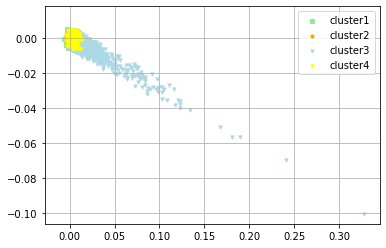

In [57]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 긍정

310

In [63]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 이슈

209

In [64]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 거래소

1390

In [65]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 긍정

234

In [66]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [67]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [68]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 1 # 긍정

In [69]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 5 # 이슈

In [70]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 12 # 거래소

In [71]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 1 # 긍정

In [72]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [73]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [74]:
kmeans.inertia_

6.27773380279541

In [75]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[1 1 3 ... 0 0 0]


In [76]:
cluster_values= list(model.wv.vocab)

In [77]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-6.27773380279541


In [78]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [79]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.6443309


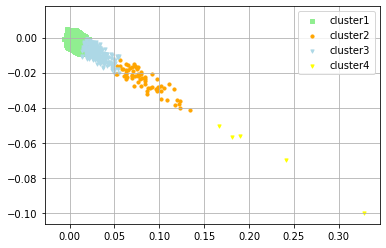

In [80]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [81]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [82]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [83]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [84]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [85]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [86]:
import scipy.spatial.distance as dist

In [87]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [88]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [89]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1987,"[0.006100855767726898, -0.0002120044082403183,...",shield,0,"[0.006121014, -0.0016900568, -0.006683522, -0....",0.024509,0.000662,1.023847,NaN
1371,"[0.006756949704140425, -0.0025558252818882465,...",comparison,0,"[0.006121014, -0.0016900568, -0.006683522, -0....",0.027912,0.003972,1.023941,NaN
201,"[0.0066422936506569386, -0.001942646806128323,...",fuck,0,"[0.006121014, -0.0016900568, -0.006683522, -0....",0.025459,0.001324,1.024135,NaN
517,"[0.001331554725766182, -0.0038304233457893133,...",omawiamy,0,"[0.006121014, -0.0016900568, -0.006683522, -0....",0.025022,0.000662,1.024360,NaN
505,"[0.0036362961400300264, 0.002752511529251933, ...",howtobuy,0,"[0.006121014, -0.0016900568, -0.006683522, -0....",0.026421,0.001986,1.024435,NaN
511,"[0.0030003967694938183, -0.0012367076706141233...",zapraszamy,0,"[0.006121014, -0.0016900568, -0.006683522, -0....",0.025776,0.001324,1.024452,NaN
478,"[0.007331357337534428, -0.0004282502632122487,...",прогноз,0,"[0.006121014, -0.0016900568, -0.006683522, -0....",0.027127,0.002648,1.024479,NaN
956,"[0.0033568628132343292, -0.0005503011052496731...",twitter,0,"[0.006121014, -0.0016900568, -0.006683522, -0....",0.029150,0.004633,1.024516,NaN
1534,"[0.005408739671111107, -0.002650077221915126, ...",asics,0,"[0.006121014, -0.0016900568, -0.006683522, -0....",0.025421,0.000662,1.024759,NaN
1186,"[0.009153367020189762, -0.002672820584848523, ...",climb,0,"[0.006121014, -0.0016900568, -0.006683522, -0....",0.026843,0.001986,1.024857,NaN


In [90]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(50,'score') # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
58,"[0.0863136276602745, -0.032083120197057724, -0...",surge,1,"[0.08239996, -0.024339516, -0.094013155, -0.04...",0.053890,0.088697,0.965193,NaN
57,"[0.08707059174776077, -0.028532391414046288, -...",watch,1,"[0.08239996, -0.024339516, -0.094013155, -0.04...",0.037531,0.029786,1.007744,NaN
16,"[0.07611528784036636, -0.021898919716477394, -...",high,1,"[0.08239996, -0.024339516, -0.094013155, -0.04...",0.034450,0.023167,1.011283,NaN
203,"[0.08003710210323334, -0.021045153960585594, -...",trade,1,"[0.08239996, -0.024339516, -0.094013155, -0.04...",0.031680,0.016548,1.015132,NaN
228,"[0.08375072479248047, -0.022596877068281174, -...",core,1,"[0.08239996, -0.024339516, -0.094013155, -0.04...",0.032305,0.014562,1.017743,NaN
100,"[0.08364423364400864, -0.024621574208140373, -...",exchange,1,"[0.08239996, -0.024339516, -0.094013155, -0.04...",0.033979,0.014562,1.019417,NaN
26,"[0.09665267914533615, -0.029349349439144135, -...",market,1,"[0.08239996, -0.024339516, -0.094013155, -0.04...",0.111950,0.087374,1.024577,NaN
6,"[0.07264060527086258, -0.021700983867049217, -...",cardano,1,"[0.08239996, -0.024339516, -0.094013155, -0.04...",0.043878,0.019196,1.024682,NaN
28,"[0.07922694087028503, -0.019716385751962662, -...",start,1,"[0.08239996, -0.024339516, -0.094013155, -0.04...",0.047402,0.021843,1.025559,NaN
262,"[0.0763414278626442, -0.025101741775870323, -0...",dash,1,"[0.08239996, -0.024339516, -0.094013155, -0.04...",0.040200,0.011915,1.028286,NaN


In [91]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
144,"[0.026051105931401253, -0.012320959009230137, ...",world,2,"[0.029314786, -0.008869034, -0.033865564, -0.0...",0.026582,0.005957,1.020625,NaN
1466,"[0.028649747371673584, -0.006186756771057844, ...",similar,2,"[0.029314786, -0.008869034, -0.033865564, -0.0...",0.025745,0.004633,1.021112,NaN
1208,"[0.026912590488791466, -0.005001121666282415, ...",tipprbot,2,"[0.029314786, -0.008869034, -0.033865564, -0.0...",0.030329,0.007943,1.022386,NaN
569,"[0.02601894736289978, -0.009831679053604603, -...",give,2,"[0.029314786, -0.008869034, -0.033865564, -0.0...",0.026956,0.003972,1.022984,NaN
23,"[0.033203285187482834, -0.00870891660451889, -...",kraken,2,"[0.029314786, -0.008869034, -0.033865564, -0.0...",0.031098,0.007943,1.023155,NaN
1003,"[0.03147008270025253, -0.008890263736248016, -...",hijack,2,"[0.029314786, -0.008869034, -0.033865564, -0.0...",0.027166,0.003310,1.023856,NaN
1354,"[0.025971688330173492, -0.0065430146642029285,...",shame,2,"[0.029314786, -0.008869034, -0.033865564, -0.0...",0.032733,0.008605,1.024128,NaN
246,"[0.02891039103269577, -0.004352346528321505, -...",subido,2,"[0.029314786, -0.008869034, -0.033865564, -0.0...",0.030852,0.005957,1.024895,NaN
127,"[0.02716035768389702, -0.009862572886049747, -...",tweet,2,"[0.029314786, -0.008869034, -0.033865564, -0.0...",0.030215,0.005295,1.024920,NaN
601,"[0.03413183242082596, -0.008856399916112423, -...",open,2,"[0.029314786, -0.008869034, -0.033865564, -0.0...",0.029785,0.004633,1.025151,NaN


In [92]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
5,"[0.24129988253116608, -0.06990233808755875, -0...",cash,3,"[0.22126761, -0.066834725, -0.25360557, -0.118...",0.135730,0.471288,0.664442,NaN
8,"[0.18951177597045898, -0.05647182837128639, -0...",bitcoincash,3,"[0.22126761, -0.066834725, -0.25360557, -0.118...",0.198715,0.232334,0.966381,NaN
2,"[0.3277187943458557, -0.10027248412370682, -0....",bitcoin,3,"[0.22126761, -0.066834725, -0.25360557, -0.118...",0.754127,0.777095,0.977031,NaN
3,"[0.18087854981422424, -0.05678694322705269, -0...",ethereum,3,"[0.22126761, -0.066834725, -0.25360557, -0.118...",0.305213,0.113850,1.191363,NaN
20,"[0.16692905128002167, -0.05074002221226692, -0...",crypto,3,"[0.22126761, -0.066834725, -0.25360557, -0.118...",0.387104,0.120470,1.266635,NaN


In [93]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 비즈

1846

In [94]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 긍정

66

In [95]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 인플

226

In [97]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 투자

5

In [98]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [99]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 7 # 비즈

In [100]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 2 # 긍정

In [101]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 6 # 인플

In [102]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 11 # 투자

In [103]:
temp_cluster_result1['Silhouette'] = 0.6406296
temp_cluster_result['Silhouette'] = 0.6406296
temp_cluster_result1['result'] = 1
temp_cluster_result['result'] = 1

In [104]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/after_up_BCH0_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/after_up_BCH0_cosine")